1093.75
4.14406687357788
The density of hydrophones is 405.15755445577423 hydrophones per km^3.
1679


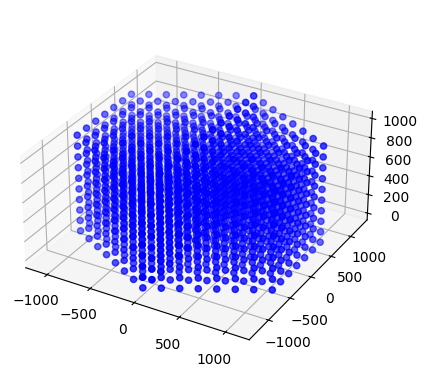

In [75]:
#plotting the hydrophones

xrange = [-1000,1000]                                                                       # XLoc range in meters      
yrange = [-1000,1000]                                                                       # YLoc range in meters
zrange = [-500,500] 
D = 3

LocID = 3

import numpy as np


Nz = 10 
Cluster_Size = 1
Z_Spacing = 10


# hexaconal shape
if LocID == 3:
    # Define the distance between the two layers in z
    Z_Inititally = np.linspace(zrange[0], zrange[1], Nz)
    Z_Layers = Z_Inititally[1] - Z_Inititally[0]

    # Initialize an array to store hydrophone locations
    Locs = np.empty((0, 3), float)
    Fill_Count = 0
    Number_of_Slots = 0

    for k in range(Nz): 
        for l in range(Cluster_Size):
            z = zrange[0] + k * Z_Layers + l * Z_Spacing
            diagonal_hydrophones = 14
            hexagonal_layers = 8
            buffer = 0

            for n in range(hexagonal_layers):
                x = n * (625/hexagonal_layers) * 2 

                for i in range(diagonal_hydrophones):
                    
                    y = yrange[0] + n * buffer + i * ((((2 * yrange[1] * 1.25) - (2 * n * buffer)) / (diagonal_hydrophones - 1)))
                    
                    if i==1 and x==0:
                        save = y - yrange[0]
                    
                    row = np.array([x, y, z]).reshape(1, -1)  
                    Locs = np.vstack((Locs, row))
                    Number_of_Slots += 1

                    if Fill_Count != 0:
                        row = np.array([-x, y, z]).reshape(1, -1)  
                        Locs = np.vstack((Locs, row))
                        Number_of_Slots += 1

                    Fill_Count += 1
                
                buffer = (1/2) * save
                
                if diagonal_hydrophones >= 5: 
                    diagonal_hydrophones -= 1


Locs[:,1] = Locs[:,1] - 250  
maxi = np.max(Locs[:,0])
mini = np.min(Locs[:,0])
print(maxi)

s = (2 * (maxi/1000)) / np.sqrt(3)
area = ((3 * np.sqrt(3)) / 2) * s**2
print(area)

print(f"The density of hydrophones is {Number_of_Slots / (((3 * np.sqrt(3)) / 2) * s**2 * (2 * zrange[1]/1000))} hydrophones per km^3.")
print(Number_of_Slots)

Locs[:,2] = Locs[:,2] + 500

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plot all the Locs in a 3D graph

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Locs[:,0], Locs[:,1], Locs[:,2],color='blue')
ax.set_box_aspect([2,2,1])  # Set equal aspect ratio for all axes

plt.show()


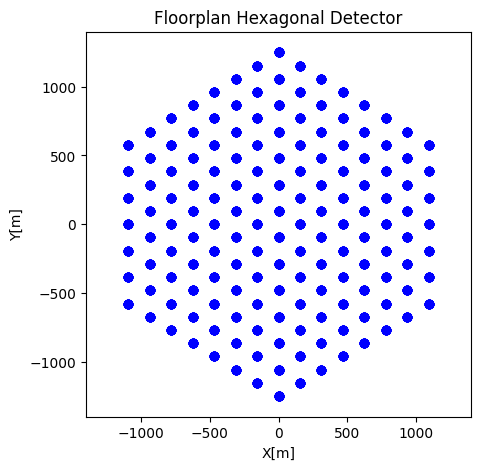

In [76]:
fig = plt.figure(figsize=(7,5))
plt.scatter(Locs[:,0], Locs[:,1],color='blue')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('X[m]')
plt.ylabel('Y[m]')
plt.xlim(-1400, 1400)
plt.ylim(-1400, 1400)
plt.title('Floorplan Hexagonal Detector')
plt.savefig('hexagonal detector.jpg')
plt.show()